# Interesting findings
1) 2008 data is actually just duplicated 2009 data. Have requested an update from sj data -- fixed 12-2-2019

2) 2004 has significantly less data

3) traffic citations (both hazardous and non-hazardous) increased starting 2017 

4) arrests made and criminal citations decreasing

5) certain results (dispo) do correlate to days of the week

In [1]:
from datetime import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pprint
import urllib
%matplotlib inline

## create a data folder to store csv files

In [2]:
if os.path.isdir('./data'):
    print('Data directory already exists.')
else:
    print('Creating data directory')
    os.mkdir("./data")

Data directory already exists.


## Programatically get all the police call records

In [3]:
request = urllib.request.Request('https://data.sanjoseca.gov/api/3/action/package_show?id=police-calls-for-service', headers={'User-Agent': 'Mozilla/5.0'})
response = urllib.request.urlopen(request)
police_dict = json.loads(response.read())
files_updated = False

# pprint.pprint(police_dict['result'])
for resource in police_dict['result']['resources']:
    if resource['format'] == 'CSV':
        url = (resource['url'])
        file_name = url.split('/')[-1]
        if os.path.exists(os.path.join('./data', file_name)):
            local_mtime = os.path.getmtime(os.path.join('./data', file_name))
            local_mtime = datetime.fromtimestamp(local_mtime)
            
            remote_mtime = datetime.fromisoformat(resource['last_modified'])
            
            if remote_mtime > local_mtime:
                urllib.request.urlretrieve(url, os.path.join('./data', file_name))
                print("Updated: ", file_name) 
                files_updated = True
            else:
                print("Already downloaded: ", file_name)
        else:
            urllib.request.urlretrieve(url, os.path.join('./data', file_name))
            print("downloaded: ", file_name) 
            files_updated = True
print("Done Downloading Police Calls files")

Already downloaded:  policecalls2004.csv
Already downloaded:  policecalls2005.csv
Already downloaded:  policecalls2006.csv
Already downloaded:  policecalls2007.csv
Already downloaded:  policecalls2008.csv
Already downloaded:  policecalls2009.csv
Already downloaded:  policecalls2010.csv
Already downloaded:  policecalls2011.csv
Already downloaded:  policecalls2012.csv
Already downloaded:  policecalls2013.csv
Already downloaded:  policecalls2014.csv
Already downloaded:  policecalls2015.csv
Already downloaded:  policecalls2016.csv
Already downloaded:  policecalls2017.csv
Already downloaded:  policecalls2018.csv
Updated:  policecalls2019.csv
Done Downloading Police Calls files


## Load csv files in to pandas dataframe

In [5]:
if files_updated == True:

    police_data = pd.DataFrame()
    pd_len = 0

    for file in os.listdir('./data'):
        df = pd.read_csv(os.path.join('./data',file))
        print("len of {0} is {1}".format(file, len(df)))
        pd_len += len(df)
        police_data = police_data.append(df, ignore_index=True)

    print("Expected total length: ", pd_len)
    print("Actual total DataFrame length: ", len(police_data))
    
    # save original data as pickle for faster reloading later
    police_data.to_pickle("police_data.pkl")

len of policecalls2011.csv is 314237
len of policecalls2018.csv is 321585
len of policecalls2007.csv is 398114
len of policecalls2008.csv is 391367
len of policecalls2005.csv is 372863
len of policecalls2019.csv is 308220
len of policecalls2014.csv is 313817
len of policecalls2006.csv is 384750
len of policecalls2016.csv is 311786
len of policecalls2010.csv is 351684
len of policecalls2017.csv is 329759
len of policecalls2013.csv is 314557
len of policecalls2012.csv is 302917
len of policecalls2015.csv is 314795
len of policecalls2004.csv is 187025
len of policecalls2009.csv is 370396
Expected total length:  5287872
Actual total DataFrame length:  5287872


In [14]:
# load data from pickle
police_data = pd.read_pickle("police_data.pkl")

In [18]:
# view data
police_data.tail(20)

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE
5287852,20090117012218PS,2641982,09/10/16,P090161043,6,1/16/2009,2009-01-16,22:17:30,11300,NARCOTICS,A,Arrest Made,NaN,S 1ST ST & E ALMA AV,San Jose,CA
5287853,20090421161556PD,2787787,09/10/16,P091110714,2,4/21/2009,2009-04-21,15:11:27,SUSCIR,SUSPICIOUS CIRCUMSTANCES,N,No report required; dispatch record only,NaN,[3900]-[4000] WOODCREEK LN,San Jose,CA
5287854,20090504133152PD,2808952,09/10/16,P091240495,6,5/4/2009,2009-05-04,12:41:23,1195,VEHICLE STOP,N,No report required; dispatch record only,NaN,NaN,San Jose,CA
5287855,20090228023428PS,2705595,09/10/16,P090590170,6,2/28/2009,2009-02-28,02:08:44,1095,PEDESTRIAN STOP,N,No report required; dispatch record only,NaN,S 1ST ST & E SAN CARLOS ST,San Jose,CA
5287856,20090128234110PS,2660249,09/10/16,P090281048,2,1/28/2009,2009-01-28,23:11:54,415,DISTURBANCE,N,No report required; dispatch record only,CAPITOL PARK,[0]-[100] BAMBI LN,San Jose,CA
5287857,20090103095752PS,2621638,09/10/16,P090030382,4,1/3/2009,2009-01-03,09:52:25,22500,PARKING VIOLATION,N,No report required; dispatch record only,NaN,[0]-[100] GIFFORD AV,San Jose,CA
5287858,20090116223040PS,2641993,09/10/16,P090161053,2,1/16/2009,2009-01-16,22:21:55,WELCK,WELFARE CHECK,T,Turned over To (TOT),NaN,S 1ST ST & MARTHA ST,San Jose,CA
5287859,20090518002751PD,2830525,09/10/16,P091371232,3,5/17/2009,2009-05-17,22:58:22,415,DISTURBANCE,N,No report required; dispatch record only,NaN,[400]-[500] CAPRICORN CT,San Jose,CA
5287860,20090228030416PS,2705608,09/10/16,P090590179,3,2/28/2009,2009-02-28,02:18:48,1033S,"ALARM, SILENT",U,Unfounded event,NaN,[300]-[400] STEVENS CREEK BL,San Jose,CA
5287861,20090421153237PD,2787790,09/10/16,P091110716,4,4/21/2009,2009-04-21,15:15:08,11300,NARCOTICS,CAN,Canceled,ERICKSON PARK,NaN,San Jose,CA


In [43]:
# clean date information 

police_data.loc[:,'OFFENSE_DATE'] = pd.to_datetime(police_data.loc[:,'OFFENSE_DATE'], errors='coerce')
police_data.loc[:,'OFFENSE_TIME'] = pd.to_datetime(police_data.loc[:,'OFFENSE_TIME'], format = '%H:%M:%S',errors='coerce').dt.time


# remove rows where OFFENSE DATE is na due to prior datetime coerce
orig_len = len(police_data)
#time_cols = police_data.loc[:,['OFFENSE_DATE']].columns
time_cols = police_data.loc[:,['OFFENSE_DATE', 'OFFENSE_TIME']].columns
police_data2 = police_data.dropna(subset=time_cols)
final_len = len(police_data2)

print("droped {} rows".format(orig_len-final_len))
print("droped year 2008 basically")

# split datetime into year, month, and day
police_data2.loc[:,'year'] = police_data2.loc[:,'OFFENSE_DATE'].dt.year
police_data2.loc[:,'month'] = police_data2.loc[:,'OFFENSE_DATE'].dt.month_name()
police_data2.loc[:,'day'] = police_data2.loc[:,'OFFENSE_DATE'].dt.day_name()
police_data2.loc[:,'hour'] = pd.to_datetime(police_data2.loc[:,'OFFENSE_TIME'], format = '%H:%M:%S',errors='coerce').dt.hour

droped 391378 rows
droped year 2008 basically


/home/tom/anaconda3/envs/sj_police_env/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/tom/anaconda3/envs/sj_police_env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
sum(police_data2['ADDRESS'].isna())

174825

In [25]:
police_data2[police_data2['CITY'] != 'San Jose']

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE,year,month,day,hour
45774,20110731024939PD,4.02554e+06,09/10/16,P112120129,4,7/31/2011,2011-07-31,01:58:41,415,DISTURBANCE,\tNo Disposition\t\tOAKLAND RD & CHARLES ST\tS...,NaN,NaN,NaN,NaN,NaN,2011,July,Sunday,1.0
298132,20110729212205PD,4.02352e+06,09/10/16,P112101029,4,7/29/2011,2011-07-29,21:19:13,415FC,"DISTURBANCE, FIRECRACKERS",\tNo Disposition\t\tNEWPORT AV & MINNESOTA AV\...,NaN,NaN,NaN,NaN,NaN,2011,July,Friday,21.0
4736598,20041006203432PD,202079,09/10/16,P042800964,2,10/6/2004,2004-10-06,20:04:04,911BUSN,UNK TYPE 911 CALL FROM BUSN,N,No report required; dispatch record only,NaN,MONTAGUE,NaN,NaN,2004,October,Wednesday,20.0
4762119,20040803120941PD,108199,09/10/16,P042160421,3,8/3/2004,2004-08-03,12:04:48,1125,TRAFFIC HAZARD,CAN,Canceled,NaN,MONTAGUE,NaN,NaN,2004,August,Tuesday,12.0
4829350,20040918230648PD,176172,09/10/16,P042621226,6,9/18/2004,2004-09-18,23:02:18,1195,VEHICLE STOP,N,No report required; dispatch record only,NaN,MONTAGUE,NaN,NaN,2004,September,Saturday,23.0
4834430,20040912162014PD,166859,09/10/16,P042560781,2,9/12/2004,2004-09-12,15:32:59,WELCK,WELFARE CHECK,N,No report required; dispatch record only,NaN,O TOOLE AV & MONTAGUE,NaN,NaN,2004,September,Sunday,15.0
4846394,20040923082635PD,182007,09/10/16,P042670169,3,9/23/2004,2004-09-23,07:15:12,1182,"VEHICLE ACCIDENT, PROPERTY DAMAGE",R,Report taken,NaN,O TOOLE AV & MONTAGUE,NaN,NaN,2004,September,Thursday,7.0
4886990,20040914013427PD,168944,09/10/16,P042580084,3,9/14/2004,2004-09-14,01:31:36,1033A,"ALARM, AUDIBLE",CAN,Canceled,NaN,MONTAGUE,NaN,NaN,2004,September,Tuesday,1.0
4904019,20041010200808PD,208296,09/10/16,P042841001,3,10/10/2004,2004-10-10,19:54:30,1125,TRAFFIC HAZARD,N,No report required; dispatch record only,NaN,MONTAGUE,NaN,NaN,2004,October,Sunday,19.0
4905543,20041016214233PD,216961,09/10/16,P042900875,4,10/16/2004,2004-10-16,18:26:49,11377,POSSESSION OF NARCOTICS,A,Arrest Made,NaN,MONTAGUE,NaN,NaN,2004,October,Saturday,18.0


In [38]:
police_data2['year'][0]==2011

True

In [42]:
police_data2[police_data2['year']==2008].head()

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE,year,month,day,hour
1033936,20080404125304PD,2.16585e+06,00:00.0,P080950315,2,4/4/2008,2008-04-04,NaT,1055,CORONERS CASE,R,Report taken,NaN,[400]-[500] S 11TH ST,San Jose,CA,2008,April,Friday,NaN
1033937,20080225173352PS,2.10359e+06,00:00.0,P080560844,5,2/25/2008,2008-02-25,NaT,1124,ABANDONED VEHICLE,R,Report taken,NaN,[1100]-[1200] WOODMINSTER DR,San Jose,CA,2008,February,Monday,NaN
1033938,20080314090330PD,2.13246e+06,00:00.0,P080740270,3,3/14/2008,2008-03-14,NaT,1033A,"ALARM, AUDIBLE",U,Unfounded event,NaN,[100]-[200] W SAN CARLOS ST,San Jose,CA,2008,March,Friday,NaN
1033939,20080327234612PD,2.15396e+06,00:00.0,P080871189,2,3/27/2008,2008-03-27,NaT,415,DISTURBANCE,U,Unfounded event,NaN,[300]-[400] W JULIAN ST,San Jose,CA,2008,March,Thursday,NaN
1033940,20080127102528PS,2.0575e+06,00:00.0,P080270436,2,1/27/2008,2008-01-27,NaT,WELCKEMS,WELFARE CHECK (COMBINED EVENT),CAN,Canceled,NaN,[500]-[600] N 5TH ST,San Jose,CA,2008,January,Sunday,NaN


In [28]:
police_data2[police_data2['CDTS'] == '20090119231915PS']

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE,year,month,day,hour
4917477,20090119231915PS,2646577,09/10/16,P090191142,2,1/19/2009,2009-01-19,23:09:27,1066,SUSPICIOUS PERSON,N,No report required; dispatch record only,NaN,[100]-[200] S 11TH ST,San Jose,CA,2009,January,Monday,23.0


In [22]:
test = pd.to_datetime(police_data.loc[:,'OFFENSE_TIME'], format = '%H:%M:%S',errors='coerce').dt.time

In [50]:
test = pd.to_datetime(police_data.loc[:,'OFFENSE_TIME'], format = '%H:%M:%S',errors='coerce').dt.hour

In [77]:
police_data.loc[police_data['OFFENSE_TIME'].isna() == False, ['CDTS','OFFENSE_DATE','OFFENSE_TIME']].tail(20)

,CDTS,OFFENSE_DATE,OFFENSE_TIME
5285119,20090117012218PS,1/16/2009,22:17:30
5285120,20090421161556PD,4/21/2009,15:11:27
5285121,20090504133152PD,5/4/2009,12:41:23
5285122,20090228023428PS,2/28/2009,2:08:44
5285123,20090128234110PS,1/28/2009,23:11:54
5285124,20090103095752PS,1/3/2009,9:52:25
5285125,20090116223040PS,1/16/2009,22:21:55
5285126,20090518002751PD,5/17/2009,22:58:22
5285127,20090228030416PS,2/28/2009,2:18:48
5285128,20090421153237PD,4/21/2009,15:15:08


In [16]:
# see what the most common call types are for each year

def get_top_ten(column='CALL_TYPE',groupby='year'):
    most_common = police_data2[column].value_counts(normalize=True).head(10)
    most_common_lst = most_common.index.to_list()
    print(most_common_lst)
    top_ten_perc = pd.DataFrame()
    top_ten_abs = pd.DataFrame()

    for group, group_data in police_data2.groupby(groupby):
        perc_counts = group_data[column].value_counts(normalize=True)
        abs_counts =group_data[column].value_counts()
        for item in most_common_lst:
            try:
                top_ten_perc.loc[group, item] = perc_counts[item]
                top_ten_abs.loc[group, item] = abs_counts[item]
            except(KeyError):
                top_ten_perc.loc[group, item] = np.nan
                top_ten_abs.loc[group, item] = np.nan
    return top_ten_perc, top_ten_abs

In [9]:
police_data2.keys()

Index(['CDTS', 'EID', 'START_DATE', 'CALL_NUMBER', 'PRIORITY', 'REPORT_DATE',
       'OFFENSE_DATE', 'OFFENSE_TIME', 'CALLTYPE_CODE', 'CALL_TYPE',
       'FINAL_DISPO_CODE', 'FINAL_DISPO', 'COMMON_PLACE_NAME', 'ADDRESS',
       'CITY', 'STATE', 'year', 'month', 'day'],
      dtype='object')

In [10]:
police_data2.head()

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE,year,month,day
0,20110104182537PS,3.72822e+06,09/10/16,P110040763,2,1/4/2011,2011-01-04,17:31:48,5150,MENTALLY DISTURBED PERSON,N,No report required; dispatch record only,NaN,[2500]-[2600] FOXDALE DR,San Jose,CA,2011,January,Tuesday
1,20110104182649PS,3.72820e+06,09/10/16,P110040751,4,1/4/2011,2011-01-04,17:22:34,415,DISTURBANCE,G,Gone on Arrival/unable to locate,NaN,ISADORA DR & MESSINA DR,San Jose,CA,2011,January,Tuesday
2,20110104182857PS,3.72822e+06,09/10/16,P110040765,3,1/4/2011,2011-01-04,17:34:42,1033A,"ALARM, AUDIBLE",N,No report required; dispatch record only,24 HOUR FITNESS,[200]-[300] ALMADEN RD,San Jose,CA,2011,January,Tuesday
3,20110104183446PS,3.72829e+06,09/10/16,P110040821,6,1/4/2011,2011-01-04,18:30:44,1195,VEHICLE STOP,N,No report required; dispatch record only,NaN,QUIMBY RD & EDGEBANK DR,San Jose,CA,2011,January,Tuesday
4,20110104185914PS,3.7283e+06,09/10/16,P110040828,2,1/4/2011,2011-01-04,18:40:13,WELCK,WELFARE CHECK,N,No report required; dispatch record only,NaN,W SAN CARLOS ST & S MARKET ST,San Jose,CA,2011,January,Tuesday


In [17]:
#ttp_call_type, tta_call_type = get_top_ten('CALL_TYPE')
ttp_final_disp, tta_final_disp = get_top_ten('FINAL_DISPO','day')

['No report required; dispatch record only', 'Canceled', 'Report taken', 'Gone on Arrival/unable to locate', 'No Disposition', 'Arrest Made', 'No Response', 'Traffic Citation Issued, Non-Hazardous Violation', 'Criminal Citation', 'Traffic Citation Issued, Hazardous Violation']


In [18]:
ttp_final_disp

,No report required; dispatch record only,Canceled,Report taken,Gone on Arrival/unable to locate,No Disposition,Arrest Made,No Response,"Traffic Citation Issued, Non-Hazardous Violation",Criminal Citation,"Traffic Citation Issued, Hazardous Violation"
Friday,0.456579,0.124210,0.112898,0.056520,0.042100,0.030995,0.027438,0.023453,0.024763,0.020440
Monday,0.442082,0.123776,0.125530,0.055899,0.052657,0.029646,0.025082,0.023719,0.021334,0.016916
Saturday,0.481523,0.133276,0.092339,0.054397,0.040268,0.027989,0.034217,0.025522,0.018796,0.014377
Sunday,0.480175,0.129486,0.094336,0.055576,0.047494,0.029739,0.031289,0.024811,0.017828,0.013227
Thursday,0.429901,0.128124,0.124559,0.058020,0.047745,0.028785,0.026277,0.024509,0.023592,0.023142
Tuesday,0.419471,0.126633,0.132600,0.057684,0.055004,0.026387,0.024892,0.027385,0.021482,0.023250
Wednesday,0.411721,0.129755,0.131656,0.059251,0.055531,0.027172,0.025647,0.025829,0.023075,0.024479


In [19]:
tta_final_disp

,No report required; dispatch record only,Canceled,Report taken,Gone on Arrival/unable to locate,No Disposition,Arrest Made,No Response,"Traffic Citation Issued, Non-Hazardous Violation",Criminal Citation,"Traffic Citation Issued, Hazardous Violation"
Friday,361436.0,98327.0,89372.0,44742.0,33327.0,24536.0,21720.0,18566.0,19603.0,16181.0
Monday,320114.0,89627.0,90897.0,40477.0,38129.0,21467.0,18162.0,17175.0,15448.0,12249.0
Saturday,396679.0,109793.0,76069.0,44812.0,33173.0,23057.0,28188.0,21025.0,15484.0,11844.0
Sunday,367699.0,99155.0,72239.0,42558.0,36369.0,22773.0,23960.0,18999.0,13652.0,10129.0
Thursday,312436.0,93116.0,90525.0,42167.0,34699.0,20920.0,19097.0,17812.0,17146.0,16819.0
Tuesday,300450.0,90702.0,94976.0,41317.0,39397.0,18900.0,17829.0,19615.0,15387.0,16653.0
Wednesday,295672.0,93182.0,94547.0,42550.0,39879.0,19513.0,18418.0,18549.0,16571.0,17579.0


In [28]:
tta_final_disp = tta_final_disp.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

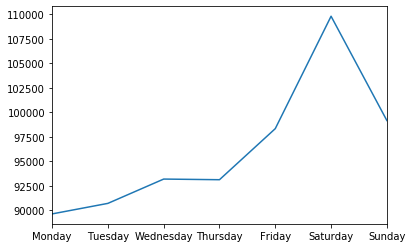

In [29]:
tta_final_disp['Canceled'].plot()

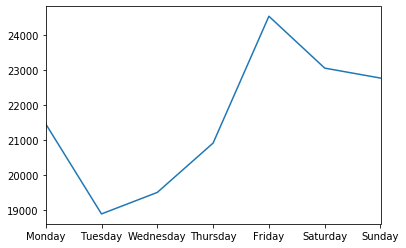

In [31]:
tta_final_disp['Arrest Made'].plot()

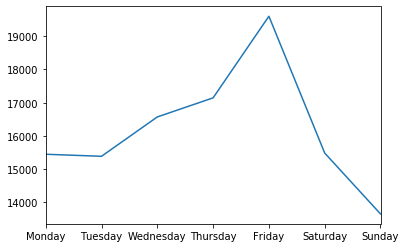

In [35]:
tta_final_disp['Criminal Citation'].plot()

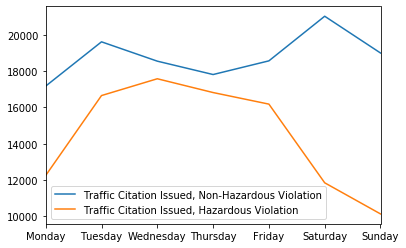

In [34]:
tta_final_disp[['Traffic Citation Issued, Non-Hazardous Violation',
                'Traffic Citation Issued, Hazardous Violation']].plot()

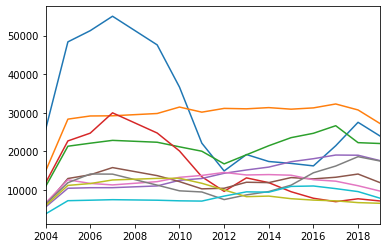

In [19]:
for item in tta_call_type.keys():
    tta_call_type[item].plot()

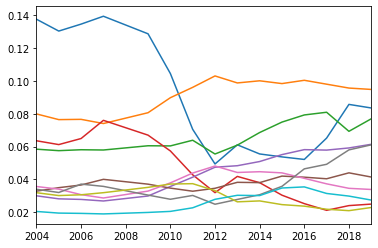

In [20]:
for item in ttp_call_type.keys():
    ttp_call_type[item].plot()

In [18]:
top_ten_df

,2004,2005,2006,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
VEHICLE STOP,0.137486,0.130277,0.134506,0.139293,0.128607,0.104442,0.070499,0.049429,0.061079,0.055518,0.053728,0.052178,0.065169,0.085663,0.083486
DISTURBANCE,0.079870,0.076407,0.076571,0.074030,0.080607,0.089737,0.096037,0.102980,0.098721,0.100023,0.098328,0.100330,0.097963,0.095605,0.094767
PEDESTRIAN STOP,0.063543,0.061217,0.064906,0.075972,0.066957,0.057342,0.042832,0.031977,0.041858,0.038045,0.030433,0.025300,0.021234,0.024099,0.025016
"ALARM, AUDIBLE",0.058420,0.057522,0.058083,0.057922,0.060501,0.060408,0.063860,0.055482,0.060876,0.068551,0.074903,0.079242,0.080888,0.069288,0.076910
"DISTURBANCE, FAMILY",0.035715,0.034112,0.030761,0.028724,0.032937,0.037914,0.043905,0.048176,0.044250,0.044716,0.044009,0.040689,0.037338,0.034607,0.033911
PARKING VIOLATION,0.034033,0.032068,0.037170,0.035792,0.030494,0.027953,0.030283,0.024939,0.027840,0.030707,0.035822,0.046449,0.049232,0.057991,0.061068
SUSPICIOUS VEHICLE,0.032886,0.035009,0.036635,0.040077,0.037142,0.034737,0.032848,0.034628,0.038258,0.038080,0.042049,0.041385,0.040420,0.044026,0.041482
"DISTURBANCE, MUSIC",0.031943,0.030205,0.030682,0.031955,0.035204,0.037219,0.037438,0.033214,0.026390,0.026952,0.024699,0.023764,0.021886,0.021021,0.022948
WELFARE CHECK,0.030062,0.028212,0.027857,0.026906,0.029935,0.035734,0.041387,0.047448,0.048362,0.050908,0.055119,0.058140,0.057862,0.059169,0.061403
"VEHICLE ACCIDENT, PROPERTY DAMAGE",0.028395,0.028791,0.027862,0.027724,0.026789,0.024010,0.020461,0.019610,NaN,NaN,0.017830,0.018167,NaN,NaN,NaN


In [40]:
police_data2['FINAL_DISPO'].value_counts(normalize=True).head(20)

No report required; dispatch record only            0.448113
Canceled                                            0.127973
Report taken                                        0.115671
Gone on Arrival/unable to locate                    0.056946
No Disposition                                      0.048638
Arrest Made                                         0.028454
No Response                                         0.028095
Traffic Citation Issued, Non-Hazardous Violation    0.024897
Criminal Citation                                   0.021437
Traffic Citation Issued, Hazardous Violation        0.019049
Courtesy Service/Citizen or agency assist           0.018541
Unfounded event                                     0.017542
Turned over To (TOT)                                0.012028
Supplemental report taken                           0.011519
Arrest by Warrant                                   0.010309
Field Interview (F.I.) Completed                    0.009608
Stranded motorist assist

In [26]:
police_data['CALL_TYPE'].value_counts(normalize=True).head(10)

VEHICLE STOP           0.093998
DISTURBANCE            0.089606
ALARM, AUDIBLE         0.064960
PEDESTRIAN STOP        0.047117
WELFARE CHECK          0.042362
SUSPICIOUS VEHICLE     0.037997
DISTURBANCE, FAMILY    0.037462
PARKING VIOLATION      0.036782
DISTURBANCE, MUSIC     0.029594
SUSPICIOUS PERSON      0.025308
Name: CALL_TYPE, dtype: float64

In [41]:
police_data['OFFENSE_DATE2'] = pd.to_datetime(police_data['OFFENSE_DATE'], errors='ignore')

In [ ]:
# need to find out where mistakes are in the OFFENSE_DATE column and correct

In [39]:
police_data[police_data['OFFENSE_DATE']=='MCKEE RD & N JACKSON AV']

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE
298133,39:58.0,1195,VEHICLE STOP,N,No report required; dispatch record only,NaN,MCKEE RD & N JACKSON AV,San Jose,CA,3791348,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
police_data[['OFFENSE_DATE', 'OFFENSE_DATE2']][100:120]

,OFFENSE_DATE,OFFENSE_DATE2
100,1/2/2011,1/2/2011
101,1/2/2011,1/2/2011
102,1/3/2011,1/3/2011
103,1/2/2011,1/2/2011
104,1/3/2011,1/3/2011
105,1/2/2011,1/2/2011
106,1/3/2011,1/3/2011
107,1/3/2011,1/3/2011
108,1/2/2011,1/2/2011
109,1/3/2011,1/3/2011
